# Exploration of customer purchasing behavior

In [1]:
import sys
import os
import missingno as msno
import logging
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sys.path.append(os.path.abspath(os.path.join("../scripts"))) 
import load_data
import plots

from data_infos import dataframeInfo
from clean import dataCleaning

In [2]:
logging.basicConfig(filename='../exploration_logfile.log', filemode='a',
                    encoding='utf-8', level=logging.DEBUG)

## Load data

In [3]:
train =  load_data.load_data('../data/train.csv')
test = load_data.load_data('../data/test.csv')
store = load_data.load_data('../data/store.csv')
sample = load_data.load_data('../data/sample_submission.csv')

## Data Information

In [4]:
trainInfos = dataframeInfo(train)
testInfos = dataframeInfo(test)
storeInfos = dataframeInfo(store)
sampleInfos = dataframeInfo(sample)

In [5]:
trainInfos.data_shape()
testInfos.data_shape()
storeInfos.data_shape()
sampleInfos.data_shape()

 There are 1017209 rows and 9 columns
 There are 41088 rows and 8 columns
 There are 1115 rows and 10 columns
 There are 41088 rows and 2 columns


In [6]:
print(trainInfos.data_types())
print('---------------')
print(testInfos.data_types())
print('---------------')
print(storeInfos.data_types())
print('---------------')
print(sampleInfos.data_types())

int64     7
object    2
dtype: int64
---------------
int64      5
object     2
float64    1
dtype: int64
---------------
float64    5
object     3
int64      2
dtype: int64
---------------
int64    2
dtype: int64


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41077 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [9]:
store.info()
print('-------------------------------------------------')
sample.info()
print('-------------------------------------------------')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB
-------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 2 columns):


In [10]:
trainInfos.percent_missing()
testInfos.percent_missing()
storeInfos.percent_missing()
sampleInfos.percent_missing()


The dataset contains 0.0 % missing values.
The dataset contains 0.0 % missing values.
The dataset contains 21.01 % missing values.
The dataset contains 0.0 % missing values.


In [11]:
print(train.columns)
print(test.columns)
print(store.columns)
print(sample.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')
Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Id', 'Sales'], dtype='object')


In [12]:
storeInfos.missing_values_table()

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


#### Field description
**Id** - an Id that represents a (Store, Date) duple within the test set  
**Store** - a unique Id for each store  
**Sales** - the turnover for any given day (this is what you are predicting)  
**Customers** - the number of customers on a given day  
**Open** - an indicator for whether the store was open: 0 = closed, 1 = open  
**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None  
**SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools  
**StoreType** - differentiates between 4 different store models: a, b, c, d  
**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. Read more about assortment here  
**CompetitionDistance** - distance in meters to the nearest competitor store  
**CompetitionOpenSince[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened  
**Promo** - indicates whether a store is running a promo on that day  
**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating  
**Promo2Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2  
**PromoInterval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store


## Data cleaning

In [13]:
train.sample(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1005635,691,5,2013-01-11,9611,689,1,1,0,0
106864,940,1,2015-04-27,9810,858,1,1,0,0
314333,415,4,2014-10-09,5932,498,1,1,0,0
529519,680,5,2014-03-14,4435,673,1,0,0,0
123452,803,7,2015-04-12,0,0,0,0,0,0


In [14]:
test.sample(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
6848,6849,1,3,2015-09-09,1.0,0,0,0
1490,1491,822,3,2015-09-16,1.0,1,0,0
15596,15597,246,7,2015-08-30,0.0,0,0,0
27776,27777,504,7,2015-08-16,0.0,0,0,1
14960,14961,532,1,2015-08-31,1.0,1,0,0


#### Represent date column in date format in the order, Year, month and the day


In [15]:
train = dataCleaning(train).dateformat('Date')
test = dataCleaning(test).dateformat('Date')

In [16]:
print(trainInfos.data_types())
print('----------------------')
print(testInfos.data_types())

int64             7
datetime64[ns]    1
object            1
dtype: int64
----------------------
int64             5
datetime64[ns]    1
float64           1
object            1
dtype: int64


In [17]:
train.set_index('Date', inplace=True)
test.set_index('Date', inplace=True)

Since we are dealing with time series, it will be useful to have data yearly and monthly.

### Creating month and year


In [18]:
train['Year'] = train.index.year
train['Month'] = train.index.month
train['Day'] = train.index.day
train['WeekOfYear'] = train.index.weekofyear

In [19]:
train.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,,
2015-07-31,1,5,5263,555,1,1,0,1,2015,7,31,31
2015-07-31,2,5,6064,625,1,1,0,1,2015,7,31,31
2015-07-31,3,5,8314,821,1,1,0,1,2015,7,31,31
2015-07-31,4,5,13995,1498,1,1,0,1,2015,7,31,31
2015-07-31,5,5,4822,559,1,1,0,1,2015,7,31,31


### Missing values analysis

#### Train and test

There is no missing values in the train set and the test set as well. However, let's analyse the zero values for quantitative variables like sales and customers.

##### Sales and customers zero values analysis

In [20]:
print("The stores have recorded 0 customers during", train[train['Customers'] == 0].shape[0], "days on the period.")

The stores have recorded 0 customers during 172869 days on the period.


In [21]:
print("The stores have recorded 0 sales during", train[train['Sales'] == 0].shape[0], "days on the period.")

The stores have recorded 0 sales during 172871 days on the period.


Let's analysis if these zero sales and customers are observed only when the stores are closed. 

In [22]:
print("There are", train[train['Open'] == 0].shape[0], "closed stores.")

There are 172817 closed stores.


In [23]:
print("There are", train[(train.Open != 0) & (train.Customers == 0)].shape[0], "days when the stores are opened without recording any customer.")

There are 52 days when the stores are opened without recording any customer.


In [24]:
print("There are", train[(train.Open != 0) & (train.Sales == 0)].shape[0], "days when the stores are opened without saling.")

There are 54 days when the stores are opened without saling.


One can notice that there are opened store with no sales/customers on working days. There're only 52 or 54 days in the data, so we can assume that there were external factors involved, for example manifestations.

In [25]:
print("Percentage of time stores are closed on the period:", round((train[train['Open'] == 0].shape[0] * 100) / train.shape[0], 2))

Percentage of time stores are closed on the period: 16.99


Since about 17% of the observations are related to closed stores, and the objective is to predict sales, they may lead to bias in the forscating.
They will be removed.

In [26]:
train_forcast = dataCleaning(train).removeClosedStores()

Since the model will only use opened stores, the prediction will only be based on open stores as well. This means that there is no thing to predict when he store is closed cause there won't be any sale.

In [28]:
test_forcast = test[test['Open'] != 0]

### Missing values in Store

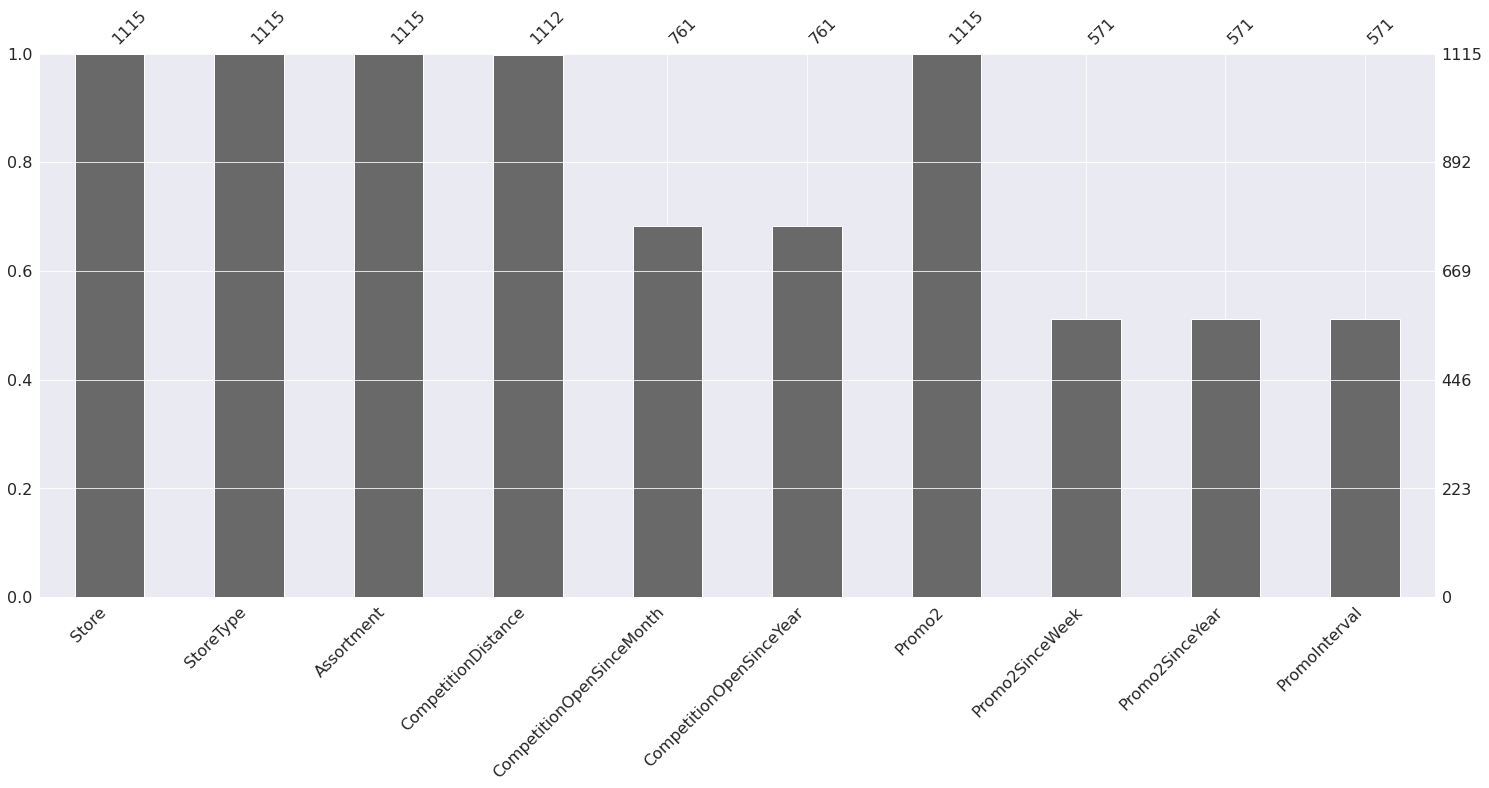

In [29]:
msno.bar(store)
plt.savefig('../images/store_missing.png')


In [27]:
storeInfos.missing_values_table()

Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,48.8,float64
Promo2SinceYear,544,48.8,float64
PromoInterval,544,48.8,object
CompetitionOpenSinceMonth,354,31.7,float64
CompetitionOpenSinceYear,354,31.7,float64
CompetitionDistance,3,0.3,float64


#### CompetitionDistance

Let's recall that: **CompetitionDistance** is the distance in meters to the nearest competitor store.  
  
Only 3 values are missing.  
  
Let's fill them.


In [28]:
store['CompetitionDistance'].skew()

2.9292856455312055

In [29]:
## Skewness greater than 0. Let's fill the missing values with their median.
store['CompetitionDistance'].fillna(store['CompetitionDistance'].median(), inplace = True)

In [30]:
store[['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].skew()

CompetitionOpenSinceMonth   -0.170750
CompetitionOpenSinceYear    -8.013062
dtype: float64

In [31]:
## Let's fill the remaining competition values with their median
store['CompetitionOpenSinceMonth'].fillna(store['CompetitionOpenSinceMonth'].median(), inplace = True)
store['CompetitionOpenSinceYear'].fillna(store['CompetitionOpenSinceYear'].median(), inplace = True)

Let's check if the missing values in the Promos variables are only observed when there is no Promo

In [32]:
dataframeInfo(store[store['Promo2'] == 0]).missing_values_table()

Your selected dataframe has 10 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Promo2SinceWeek,544,100.0,float64
Promo2SinceYear,544,100.0,float64
PromoInterval,544,100.0,object


This is actually verified. Then, this missing values are just normal. Replacing them by zero makes sense.

In [33]:
## Since there are the remaining variables with missing values, let's replace all the remaining by 0.
store.fillna(0, inplace = True)

#### Let's merge store information with the train set

In [34]:
train_merged_store = pd.merge(train, store, how = 'inner', on = 'Store')

In [35]:
train_merged_store.to_csv('../data/train_with_store.csv', index=False)

### Arrange StateHoliday in train

In [36]:
train = dataCleaning(train).cleanStateHoliday()

## Basic descriptions  

In [37]:
train[['Sales', 'Customers']].describe()

,Sales,Customers
count,1.017209e+06,1.017209e+06
mean,5.773819e+03,6.331459e+02
std,3.849926e+03,4.644117e+02
min,0.000000e+00,0.000000e+00
25%,3.727000e+03,4.050000e+02
50%,5.744000e+03,6.090000e+02
75%,7.856000e+03,8.370000e+02
max,4.155100e+04,7.388000e+03


In [38]:
(train['Sales']/train['Customers']).describe()

count    844340.000000
mean          9.493619
std           2.197494
min           0.000000
25%           7.895563
50%           9.250000
75%          10.899729
max          64.957854
dtype: float64

Over the period of study, on average customers spend about 9.50$ per day. Although there are days with Sales equal to zero.

## Checking for distribution in both training and test sets - are the promotions distributed similarly between these two groups?

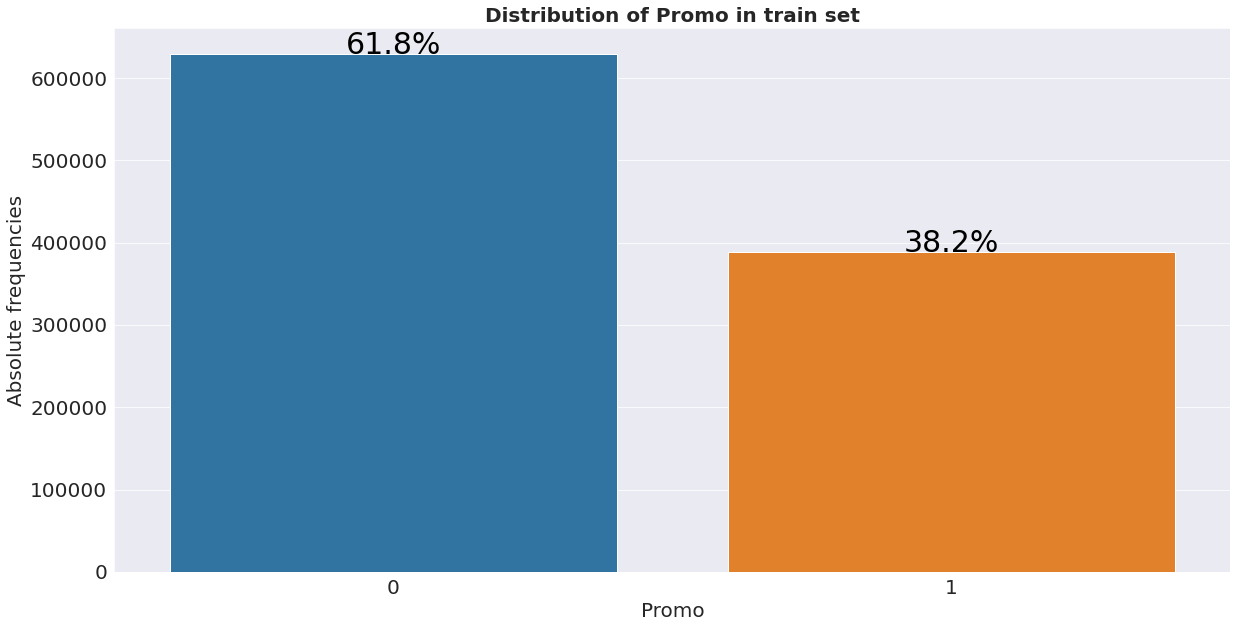

In [42]:
plots.plot_count(train, 'Promo', 'train')
plt.savefig('../images/Promo dist in train.png')

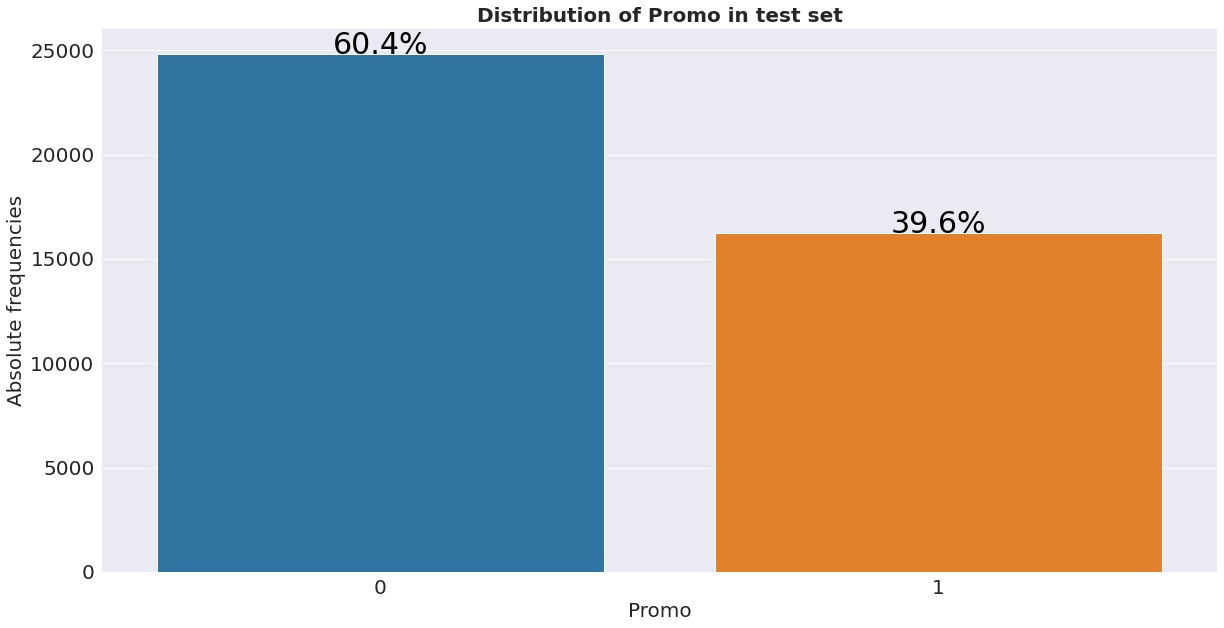

In [43]:
plots.plot_count(test, 'Promo', 'test')
plt.savefig('../images/Promo dist in test.png')

The promotions are approximatively distributed similarly between the train and the test.

### Checking & comparing sales behavior before, during and after holidays

In [39]:
# StateHoliday and SchoolHoliday are concerned
train.reset_index(inplace=True)

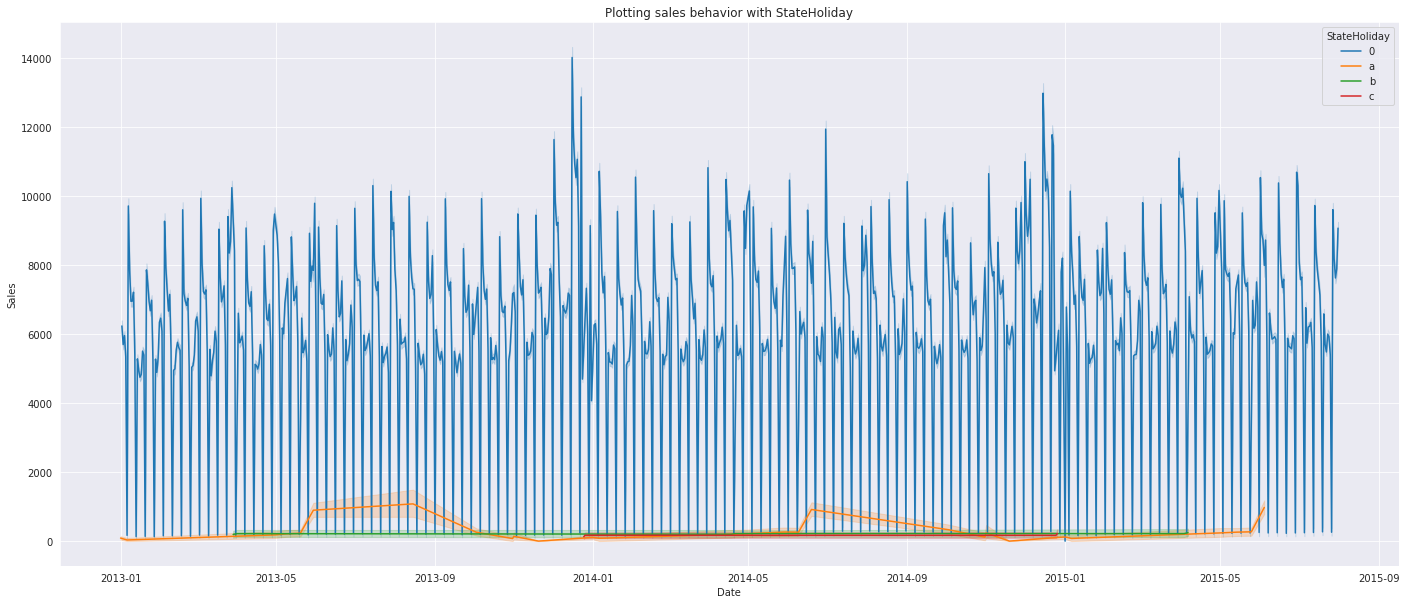

In [45]:
plots.tsHueplot(train.Date, train.Sales, train.StateHoliday, 'Plotting sales behavior with StateHoliday')
plt.savefig('../images/sales_vs_stateholiday.png')

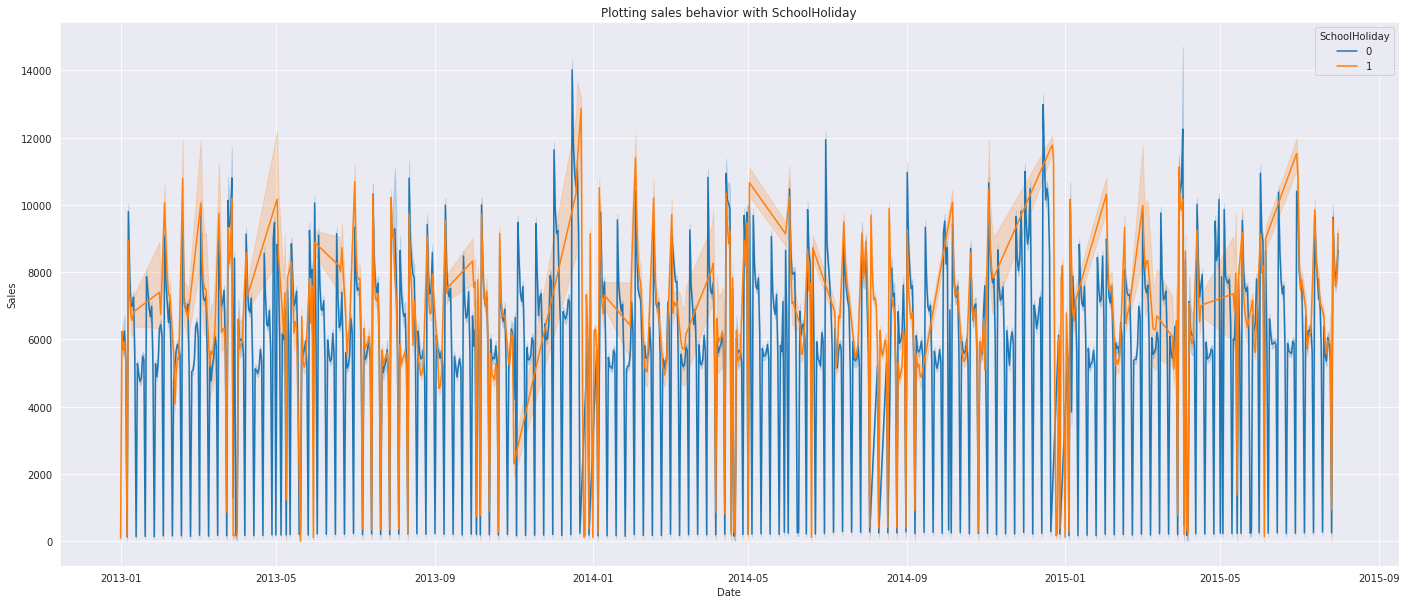

In [46]:
plots.tsHueplot(train.Date, train.Sales, train.SchoolHoliday, 'Plotting sales behavior with SchoolHoliday')
plt.savefig('../images/sales_vs_schoolholiday.png')

**StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

In function of the state holyday:  
    - sales are in general low on state holidays but high on normal days.  
    - but on public holidays, sales can be observed but not in high proportion  
    - During Easter or Christmas, there are almost no sales  

in function of the school holiday:  
    - there is no significant difference between sales behaviour on school holiday.

### Find out any seasonal (Christmas, Easter etc) purchase behaviors,

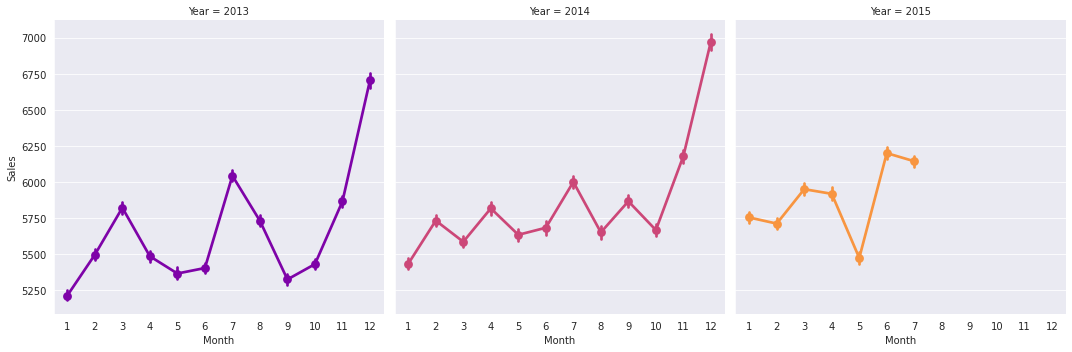

In [47]:
plots.factorplot(train, 'Month', 'Sales', 'Year', 'Year', None)
plt.savefig('../images/sales per year.png')

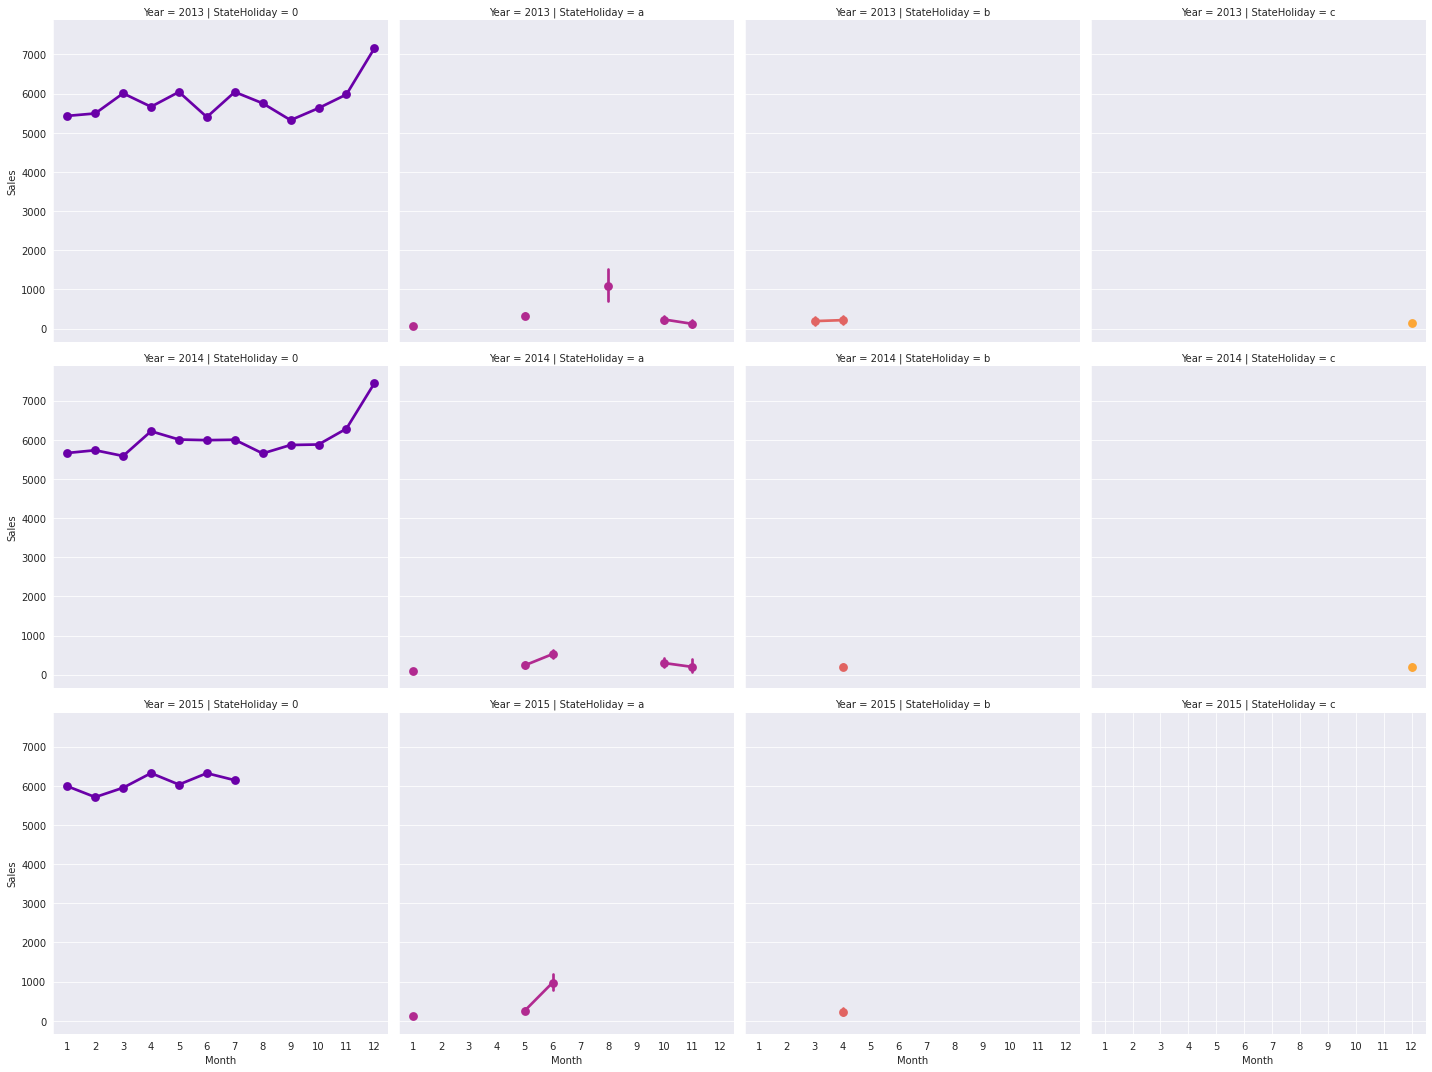

In [48]:
plots.factorplot(train, 'Month', 'Sales', 'StateHoliday', 'StateHoliday', 'Year')
plt.savefig('../images/sales per year and stateholiday.png')

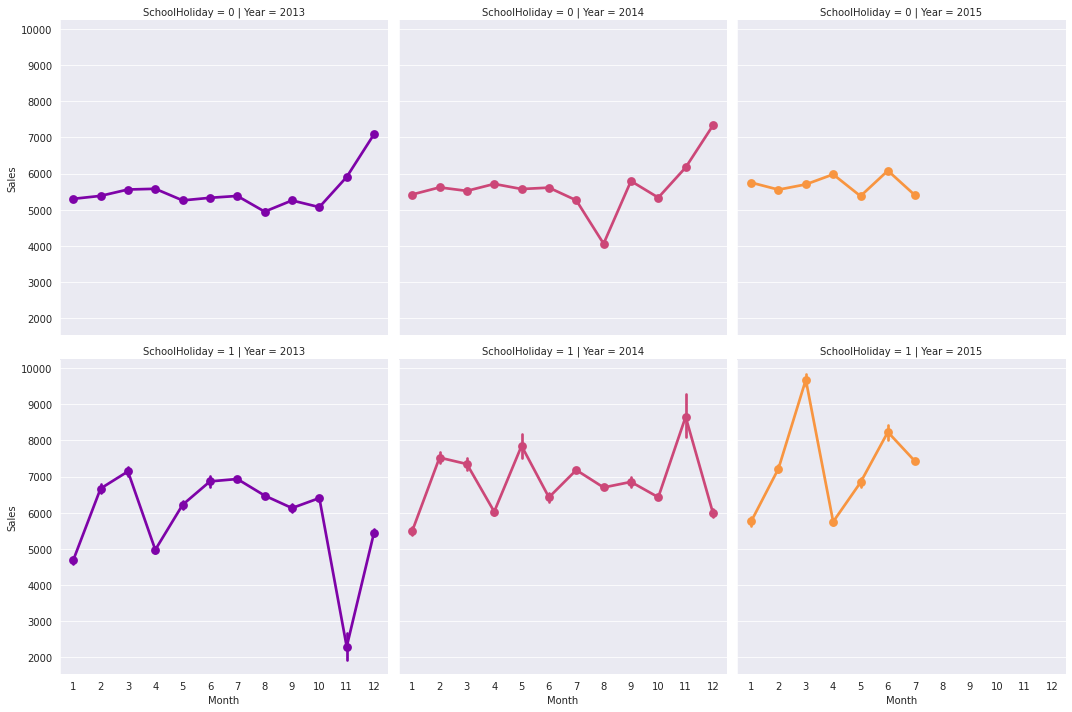

In [40]:
plots.factorplot(train, 'Month', 'Sales', 'Year', 'Year', 'SchoolHoliday')
plt.savefig('../images/sales per year and schoolholiday.png')

#### Look at autocorrelation in Month 12 for Christmas

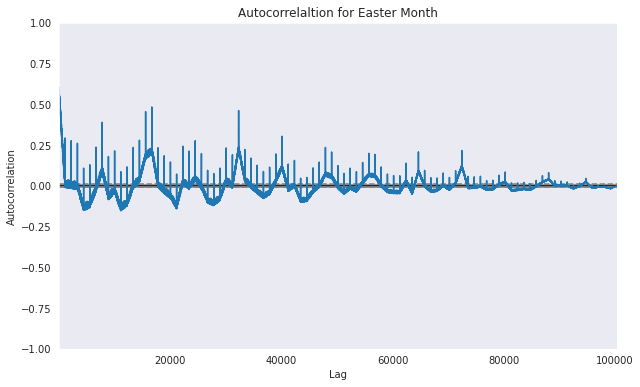

In [50]:
sales_m4 = train[train['Month'] == 4]
plots.autocorrelation(sales_m4, 'Sales', 'Autocorrelaltion for Easter Month')
plt.savefig('../images/autocorrelation month 4.png')

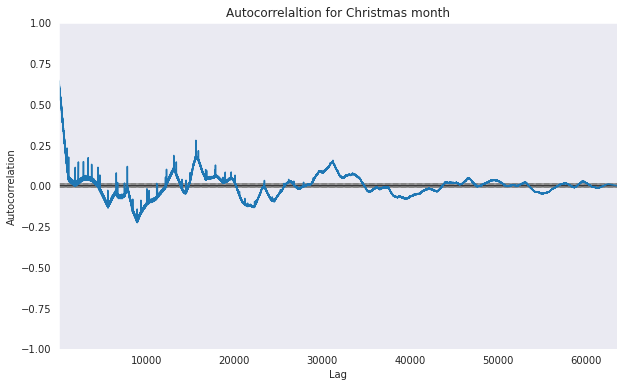

In [51]:
sales_m12 = train[train['Month'] == 12]
plots.autocorrelation(sales_m12, 'Sales', 'Autocorrelaltion for Christmas month')
plt.savefig('../images/autocorrelation month 12')

#### Seasonal purchase behaviour
One can notice that there are a lot of sales in December but not on Christmas Day.  
There are no other significant seasonal effect.  
Analysing the correlation on December, one can notice that there is a kind of autocorrelation, not very high, and the shape of the curve shows a presence of a seasonality.  
There is no a particular purchase behavior on Easter month, but there is a kind of autocorrelation, not very high, and the shape of the curve shows a presence of a seasonality.  

### Correlation between sales and number of customers

In [68]:
(train[['Sales', 'Customers']].corr())['Sales']['Customers']

0.8947107733016734

The coefficient of correlation between sales and customers is 0.89 with is high. One can say that the turnover for any given day is positively correlated with the number of customers.

### Does the promos affect sales? Are the promos attracting more customers? How does it affect already existing customers?

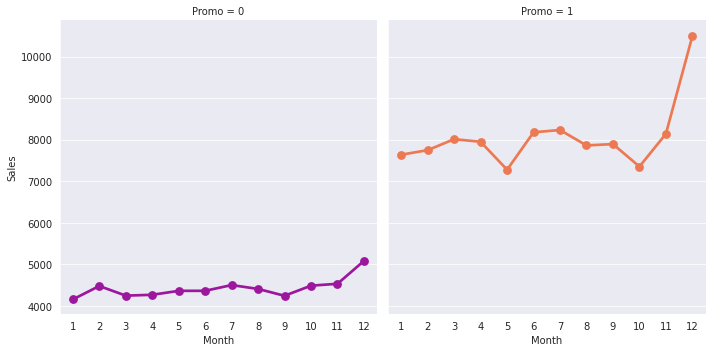

In [53]:
plots.factorplot(train, 'Month', 'Sales', 'Promo', 'Promo', None)
plt.savefig('../images/Promo and sales.png')

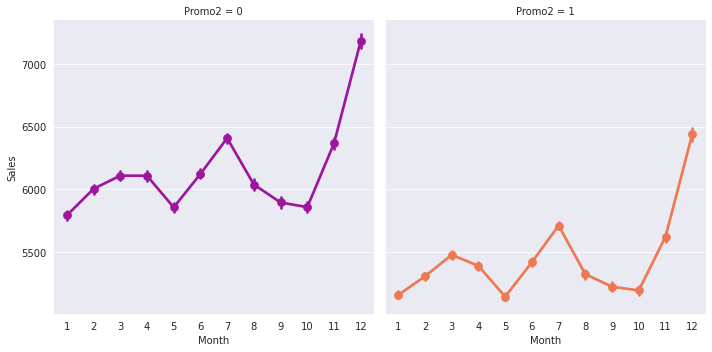

In [54]:
plots.factorplot(train_merged_store, 'Month', 'Sales', 'Promo2', 'Promo2', None)
plt.savefig('../images/Promo2 and sales.png')

Sales escalates with Promo but declines with Promo2. 

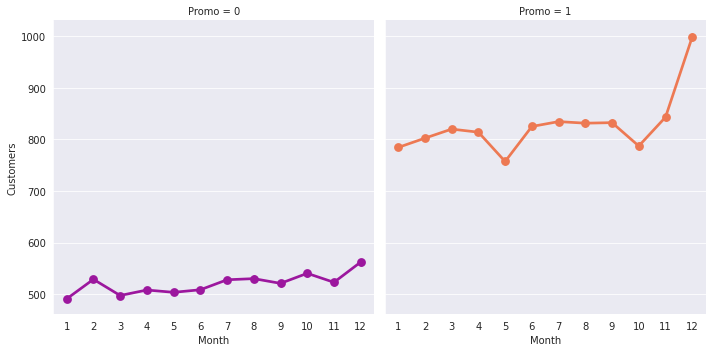

In [55]:
plots.factorplot(train, 'Month', 'Customers', 'Promo', 'Promo', None)
plt.savefig('../images/Customers and Promo.png')

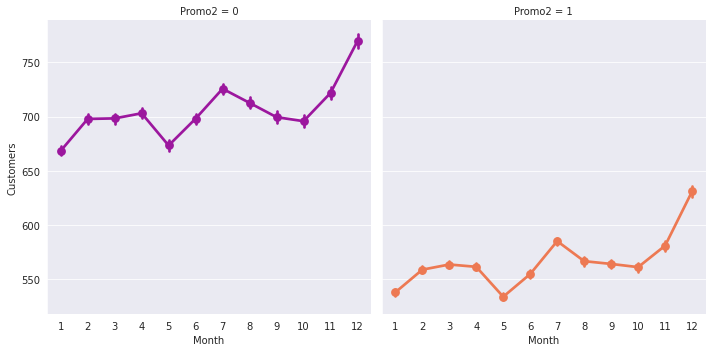

In [56]:
plots.factorplot(train_merged_store, 'Month', 'Customers', 'Promo2', 'Promo2', None)
plt.savefig('../images/Customers and Promo2.png')

Promo 1 attract more customers and surely save the existing customers while Promo2 somehow scares away existing customers and the reduces sales.

Promo2 can be deployed in more effective ways. For the moment, it is not effective.

### Which stores should Promo be deployed in?

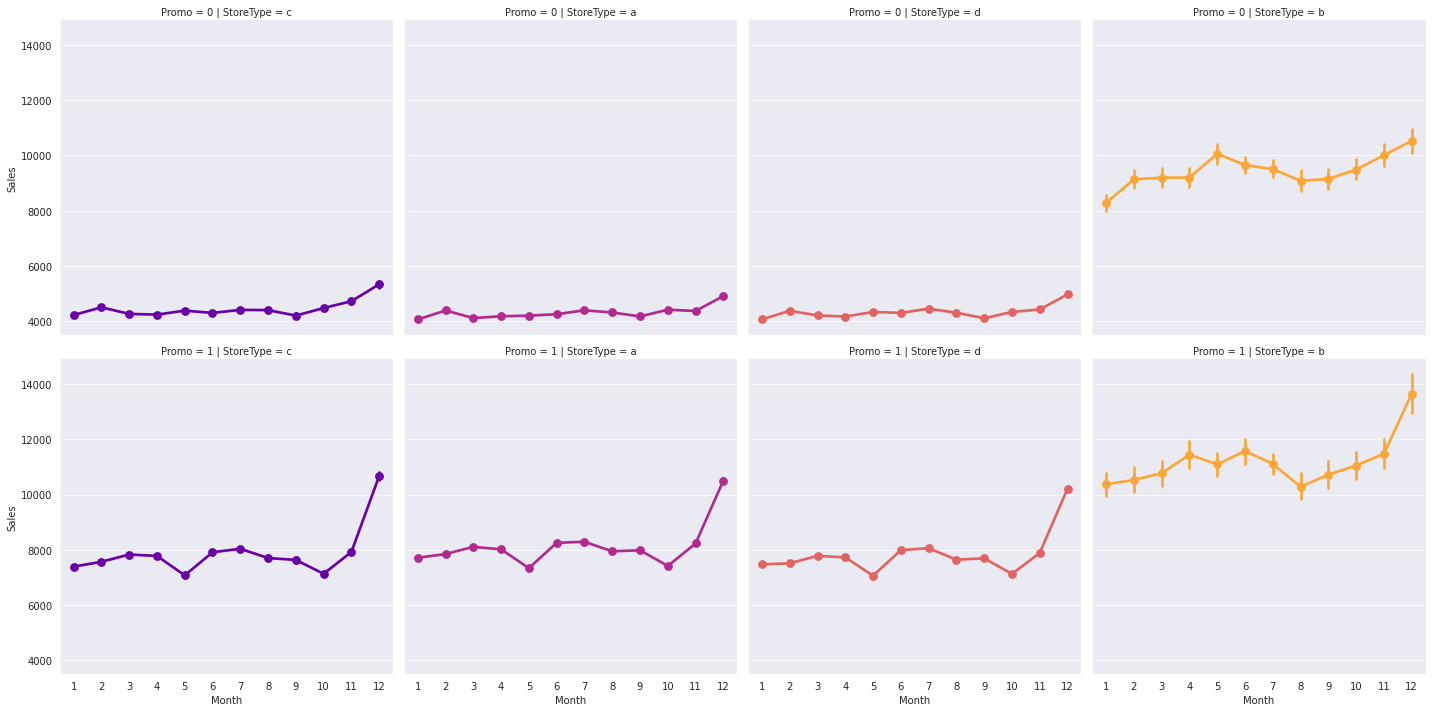

In [57]:
plots.factorplot(train_merged_store, 'Month', 'Sales', 'StoreType', 'StoreType', 'Promo')
plt.savefig('../images/sales per store type and promo.png')

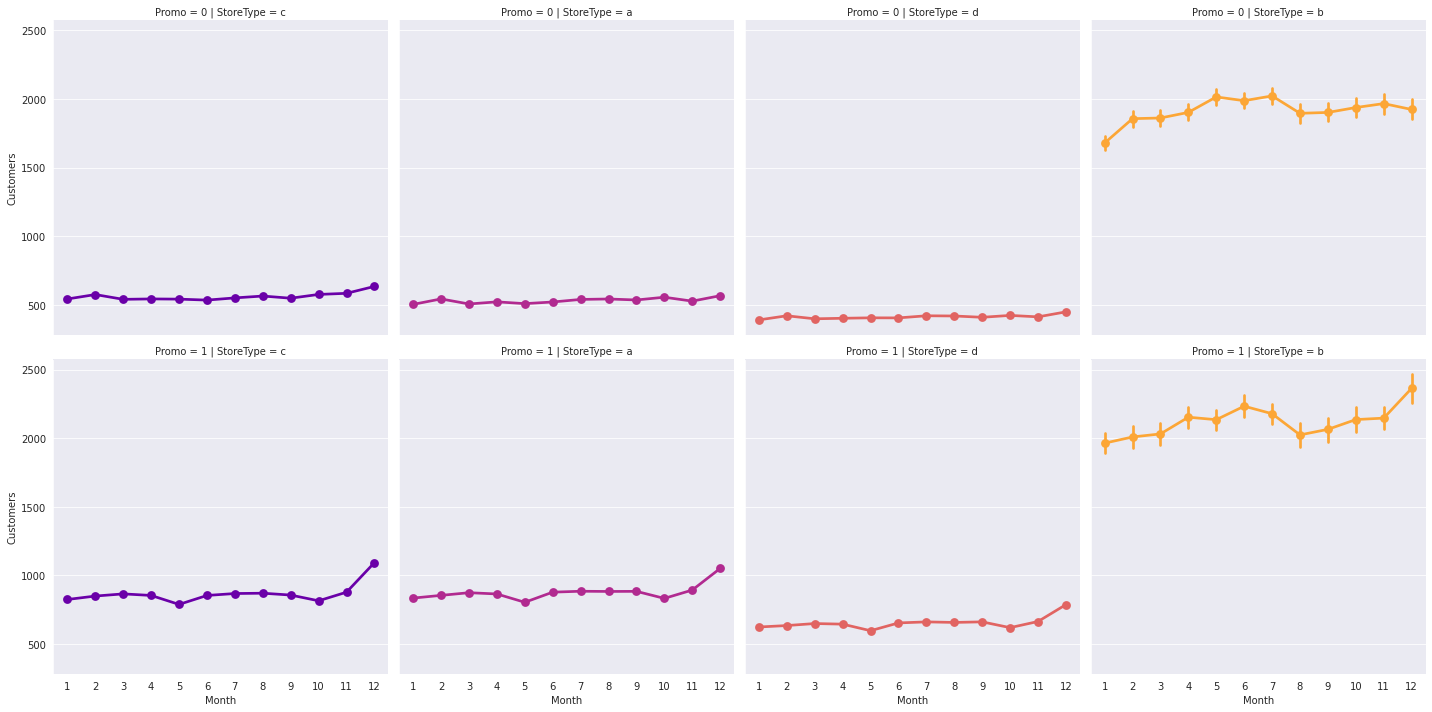

In [58]:
plots.factorplot(train_merged_store, 'Month', 'Customers', 'StoreType', 'StoreType', 'Promo')
plt.savefig('../images/Customers per store type and Promo.png')

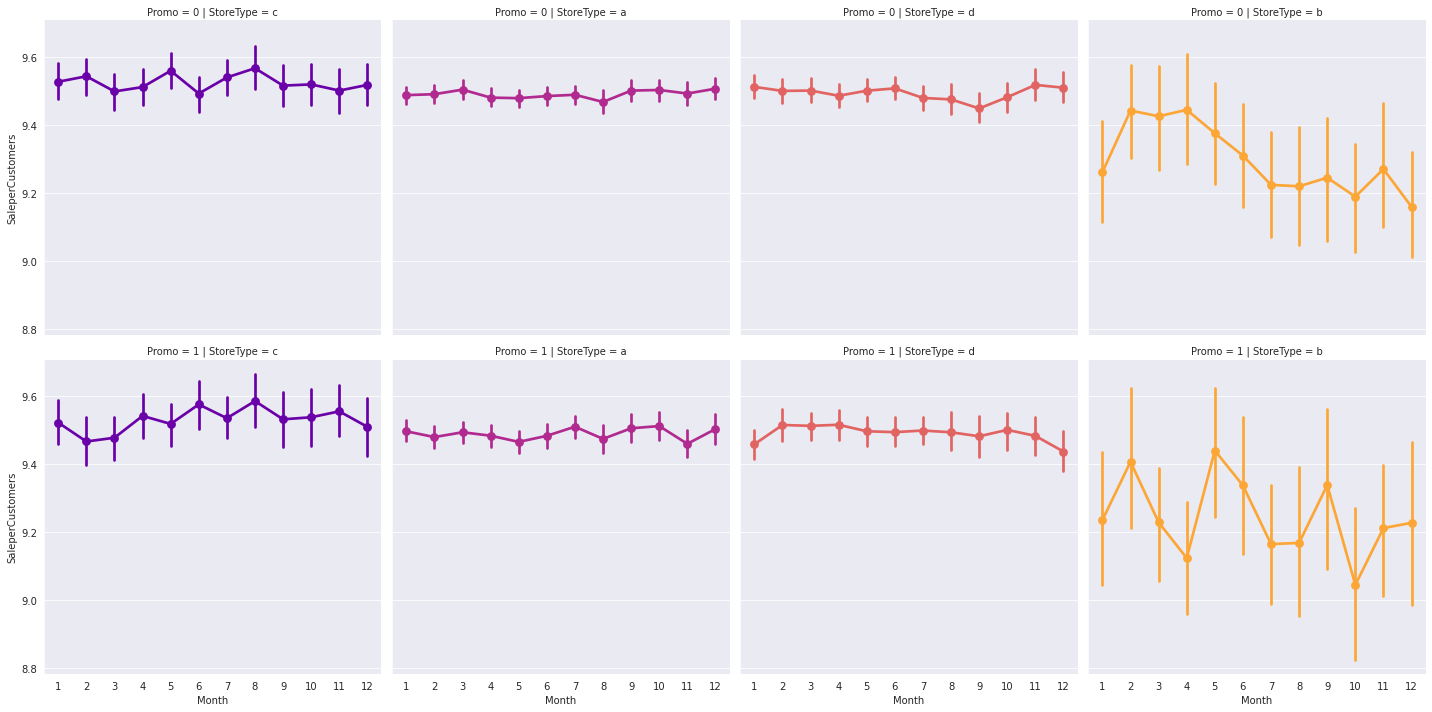

In [59]:
train_merged_store['SaleperCustomers'] = train['Sales'] / train['Customers']
plots.factorplot(train_merged_store, 'Month', 'SaleperCustomers', 'StoreType', 'StoreType', 'Promo')
plt.savefig('../images/SaleperCustomers per store type and Promo.png')

Based on the first two plots, the sales turnover as well as the number of customers is higher in stores of type b, whatever there exist promo or not. The promo has a positive effect in all the store put store d records the higher numbers of sales and customers.  
  
However, the high number of sales observed in store d is just for specific customers, not all the customers in general. Because, the store b as the lower sales per customer.  
  
In addition, sales per customers remains almost the same on Promo days. Then, the improvement of sales in the stores a, c and d is due to new customers but in store d, only some specific 'loyal' customes keep purchasing by increasing their purchases.

In conclusion:  
Since no matter what, sales are higher in store b, the promo is more effective in stores a, c and d. Hence, promo should be deployed in stores a, c and d.

### Trends of customer behavior during store open and closing times

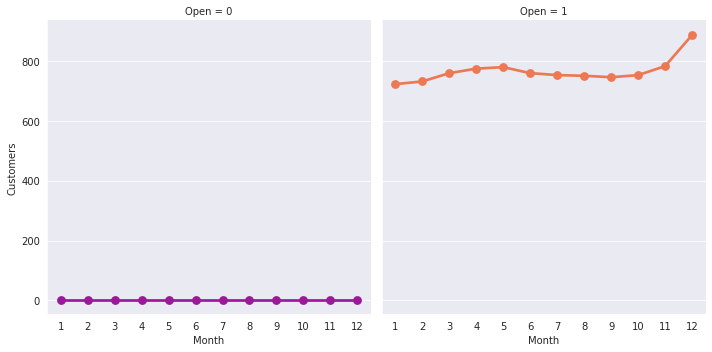

In [60]:
plots.factorplot(train, 'Month', 'Customers', 'Open', 'Open', None)
plt.savefig('../images/Customers on open times.png')

### Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [42]:
#### Stores opened on all weekdays
weekstores = train_merged_store[(train_merged_store.Open == 1) & (train_merged_store.DayOfWeek != 6) & (train_merged_store.DayOfWeek != 7)]

In [43]:
len(weekstores['Store'].unique().tolist())

1115

In [44]:
weekstores_df = train_merged_store.iloc[weekstores['Store'].tolist()]

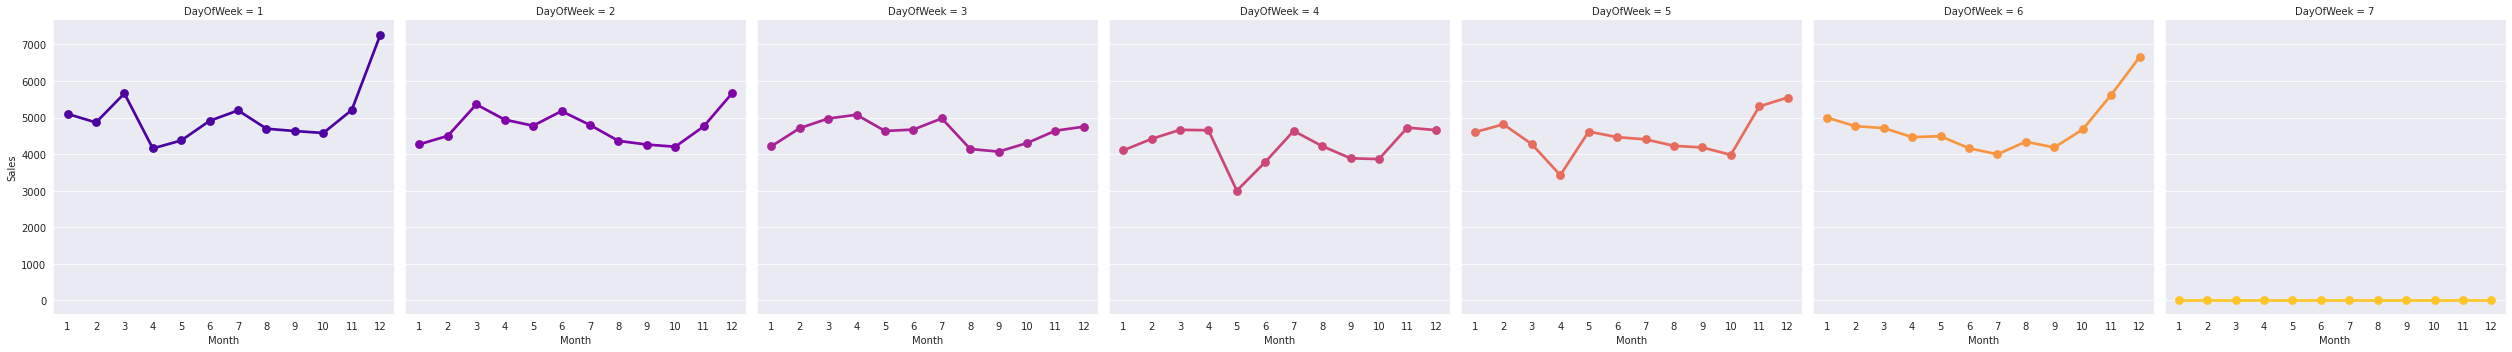

In [81]:
plots.factorplot(weekstores_df, 'Month', 'Sales', 'DayOfWeek', 'DayOfWeek', None)
plt.savefig('../images/Sales on weekends for weekstores.png')

None of the stores opened on all weekdays are opened on weekends. However, on saturdays, they sell approximately the same way as on weekdays with higher turnover on December (like on mondays).

### Check how the assortment type affects sales

Assortments have three types and each store has a defined type and assortment type:  
  
a- means basic things  
b- means extra things  
c- means extended things so the highest variety of products.  

### Store type and its respective assortment type.

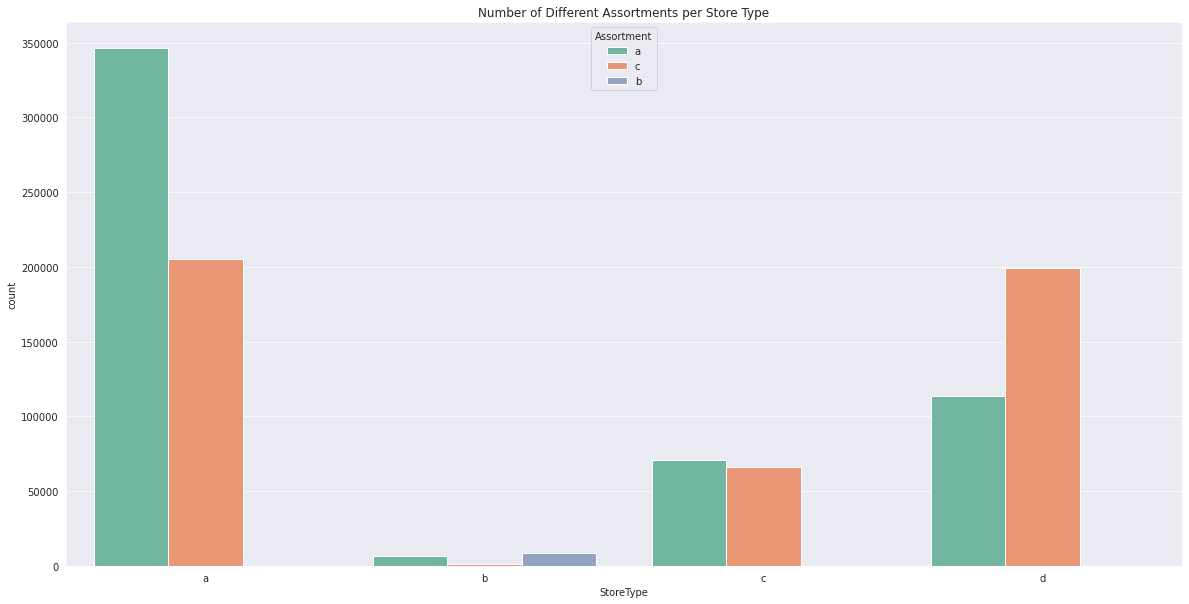

In [47]:
plt.figure(figsize=(20,10))
plots.countplot(train_merged_store, 'StoreType', 'Assortment', ["a","b","c","d"], "Number of Different Assortments per Store Type", 3)
plt.savefig('../images/store type and assortment.png')

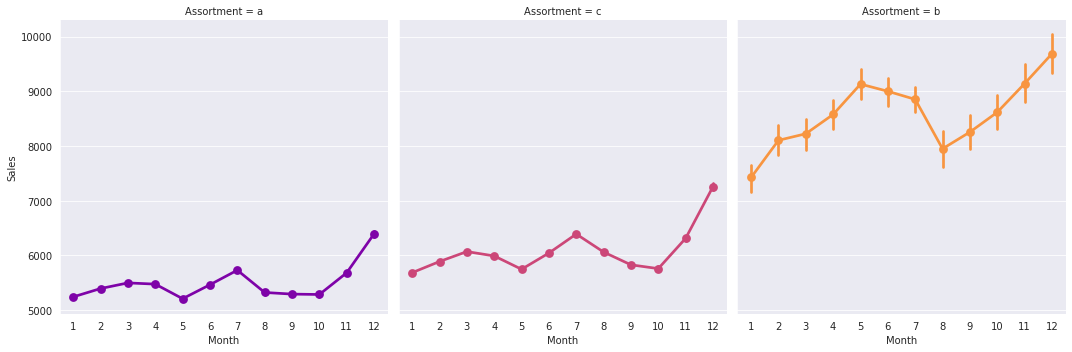

In [48]:
plots.factorplot(train_merged_store, 'Month', 'Sales', 'Assortment', 'Assortment', None)
plt.savefig('../images/Sales trend on type assortment.png')

Sales escales from assortment of type a to assortment of type c (where higher turnovers are observed).

a- means basic things  
b- means extra things  
c- means extended things so the highest variety of products.  


### How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?

### How does the opening or reopening of new competitors affect stores?

In [59]:
round(train_merged_store[['Sales', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear']].corr(), 3)

,Sales,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear
Sales,1.000,-0.019,-0.024,0.010
CompetitionDistance,-0.019,1.000,-0.051,0.021
CompetitionOpenSinceMonth,-0.024,-0.051,1.000,-0.043
CompetitionOpenSinceYear,0.010,0.021,-0.043,1.000


The distance to the next competition does not affect sales, because there are not correlated. (Correlation coefficient near to 0)

# Insights from the Exploration

- 17% of the observations are related to closed stores. To predict sales, they may lead to bias in the forscating. They will be removed.
- One can notice that there are opened store with no sales/customers on working days. There're only 52 or 54 days in the data. External factors  might be involved, for example manifestations.
- Over the period of study, on average customers spend about 9.50$ per day. Although there are days with Sales equal to zero.
- The promotions are approximatively distributed similarly between the train and the test.
- sales are in general low on state holidays but high on normal days.
- But on public holidays, sales can be observed but not in high proportion
- During Easter or Christmas, there are almost no sales
- There is no significant difference between sales behaviour on school holiday.
- One can notice that there are a lot of sales in December but not on Christmas Day. There are no other significant/particular seasonal effect.
- There is no a particular purchase behavior on Easter month, but there is a kind of autocorrelation, not very high, showing a presence of a seasonality.
- The turnover for any given day is positively correlated with the number of customers.
- Sales escalates with Promo but declines with Promo2. 
- Promo 1 attract more customers and surely save the existing customers while Promo2 somehow scares away existing customers and the reduces sales.
- Promo2 can be deployed in more effective ways. For the moment, it is not effective.
- Store b always has higher turnover and number of customer. However, it has lower sales per customers. Higher sales are surely related to specific customers.
- Store a, c and d are significantly positively affected by Promo. Promo should then be deployed on them. 
- None of the stores opened on all weekdays are opened on weekends. However, on saturdays, they sell approximately the same way as on weekdays with higher turnover on December (like on mondays).
- Sales escales from assortment of type a to assortment of type c (where higher turnovers are observed).
- The distance to the next competition does not affect sales
- The modeling part will not used days when stores are closed.